In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('future.no_silent_downcasting', True)

In [12]:
df = pd.read_csv('segments_distribution.csv',delimiter=';')
df

,No.,Segment name,Abbreviation,Normal_4,Normal_6,Normal_7,Normal_8,Normal_9,Normal_18,Diseased_4,...,Diseased_17,Diseased_20,Normal_10,Normal_14,Normal_17,Normal_20,Diseased_9,Diseased_11,Diseased_12,Diseased_14
0,1,Proximal of RCA,pRCA,x,x,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
1,2,Medial of RCA,mRCA,x,x,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
2,3,Distal of RCA,dRCA,x,x,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
3,4,Right posterior descending artery,R-PDA,x,x,x,x,x,NaN,x,...,x,x,x,x,NaN,x,x,x,x,x
4,5,Left main coronary artery,LM,x,x,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
5,6,Proximal of LAD,pLAD,x,x,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
6,7,Medial of LAD,mLAD,x,x,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
7,8,Distal of LAD,dLAD,x,x,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
8,9,First diagonal branch,D1,x,NaN,x,x,NaN,x,x,...,x,x,x,x,x,x,x,x,x,NaN
9,10,Second diagonal branch,D2,NaN,NaN,NaN,NaN,NaN,NaN,x,...,NaN,x,x,NaN,x,x,x,x,NaN,NaN


In [13]:
# Replace 'x' with 1
df.replace('x', 1, inplace=True)

# Replace NaN (missing values) with 0
df.fillna(0, inplace=True)

df = df.rename(columns=lambda x: x.replace('Normal_', 'Normal_') if x.startswith('Normal_') else x)

# Add segment number in parentheses to the Abbreviation column
df['Abbreviation'] = df.apply(lambda row: f"({row['No.']}) {row['Abbreviation']}", axis=1)
df

,No.,Segment name,Abbreviation,Normal_4,Normal_6,Normal_7,Normal_8,Normal_9,Normal_18,Diseased_4,...,Diseased_17,Diseased_20,Normal_10,Normal_14,Normal_17,Normal_20,Diseased_9,Diseased_11,Diseased_12,Diseased_14
0,1,Proximal of RCA,(1) pRCA,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,2,Medial of RCA,(2) mRCA,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,3,Distal of RCA,(3) dRCA,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,4,Right posterior descending artery,(4) R-PDA,1,1,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
4,5,Left main coronary artery,(5) LM,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,6,Proximal of LAD,(6) pLAD,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,7,Medial of LAD,(7) mLAD,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,8,Distal of LAD,(8) dLAD,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,9,First diagonal branch,(9) D1,1,0,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,0
9,10,Second diagonal branch,(10) D2,0,0,0,0,0,0,1,...,0,1,1,0,1,1,1,1,0,0


In [14]:
# Remove the first three columns (Segment index, Segment name, Abbreviation)
df_data = df.iloc[:, 3:]

# Compute segment-wise statistics
segment_stats = pd.DataFrame({
    'Segment': df['Segment name'],
    'Abbreviation': df['Abbreviation'],
    'Total presence (sum)': df_data.sum(axis=1),
    'Mean per segment': df_data.mean(axis=1),
    'Percentage of presence': (df_data.sum(axis=1) / df_data.shape[1]) * 100
})

# Compute overall statistics per case
case_stats = pd.DataFrame({
    'Case': df_data.columns,
    'Total presence (sum)': df_data.sum(),
    'Mean per case': df_data.mean(),
    'Percentage of presence': (df_data.sum() / df_data.shape[0]) * 100
})

In [15]:
segment_stats

,Segment,Abbreviation,Total presence (sum),Mean per segment,Percentage of presence
0,Proximal of RCA,(1) pRCA,40,1.0,100.0
1,Medial of RCA,(2) mRCA,40,1.0,100.0
2,Distal of RCA,(3) dRCA,40,1.0,100.0
3,Right posterior descending artery,(4) R-PDA,32,0.8,80.0
4,Left main coronary artery,(5) LM,40,1.0,100.0
5,Proximal of LAD,(6) pLAD,40,1.0,100.0
6,Medial of LAD,(7) mLAD,40,1.0,100.0
7,Distal of LAD,(8) dLAD,40,1.0,100.0
8,First diagonal branch,(9) D1,32,0.8,80.0
9,Second diagonal branch,(10) D2,26,0.65,65.0


In [16]:
case_stats

,Case,Total presence (sum),Mean per case,Percentage of presence
Normal_4,Normal_4,14,0.777778,77.777778
Normal_6,Normal_6,11,0.611111,61.111111
Normal_7,Normal_7,15,0.833333,83.333333
Normal_8,Normal_8,13,0.722222,72.222222
Normal_9,Normal_9,12,0.666667,66.666667
Normal_18,Normal_18,12,0.666667,66.666667
Diseased_4,Diseased_4,14,0.777778,77.777778
Diseased_10,Diseased_10,13,0.722222,72.222222
Normal_2,Normal_2,11,0.611111,61.111111
Normal_11,Normal_11,16,0.888889,88.888889


In [17]:
# Define segment categories based on No. column
primary_segments = [1, 2, 5, 6, 7, 11]  # pRCA, mRCA, LM, pLAD, mLAD, pLCx
secondary_segments = [3, 4, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18]
tertiary_segments = [19]

# Function to map segments
def map_category(row):
    if row['No.'] in primary_segments:
        return 'Primary'
    elif row['No.'] in secondary_segments:
        return 'Secondary'
    elif row['No.'] in tertiary_segments:
        return 'Tertiary'
    else:
        return 'Unknown'

df['Category'] = df.apply(map_category, axis=1)

# Melt the DataFrame to long format for plotting
df_long = df.melt(id_vars=['No.', 'Segment name', 'Abbreviation', 'Category'],
                  var_name='Case', value_name='Presence')

# Convert presence to integer
df_long['Presence'] = df_long['Presence'].astype(int)

# Split Normal and Diseased for comparison
df_long['Case Type'] = df_long['Case'].apply(lambda x: 'Normal' if 'Normal' in x else 'Diseased')

df_long

,No.,Segment name,Abbreviation,Category,Case,Presence,Case Type
0,1,Proximal of RCA,(1) pRCA,Primary,Normal_4,1,Normal
1,2,Medial of RCA,(2) mRCA,Primary,Normal_4,1,Normal
2,3,Distal of RCA,(3) dRCA,Secondary,Normal_4,1,Normal
3,4,Right posterior descending artery,(4) R-PDA,Secondary,Normal_4,1,Normal
4,5,Left main coronary artery,(5) LM,Primary,Normal_4,1,Normal
...,...,...,...,...,...,...,...
715,14,Second obtuse marginal branch,(14) OM2,Secondary,Diseased_14,1,Diseased
716,15,Left posterior descending artery,(15) L-PDA,Secondary,Diseased_14,0,Diseased
717,16,Right posterolateral branch,(16) R-PLB,Secondary,Diseased_14,1,Diseased
718,17,Ramus intermedius,(17) RI,Secondary,Diseased_14,0,Diseased


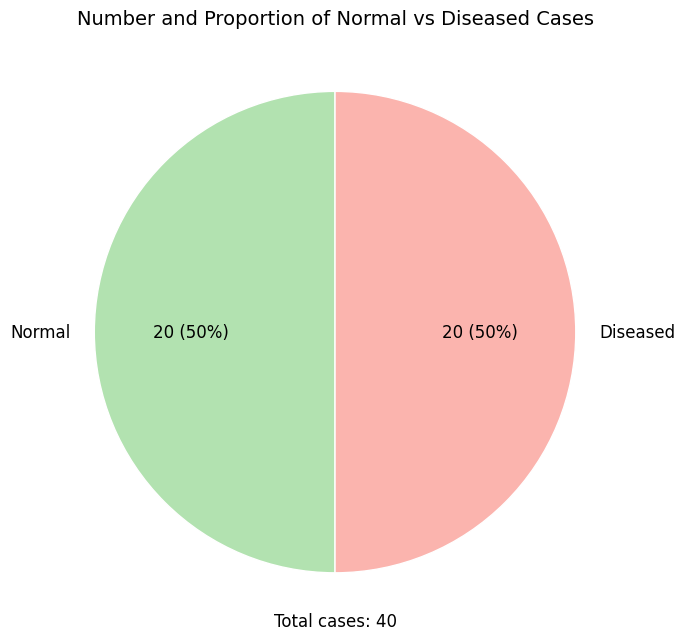

In [18]:
# Ensure case_counts is ordered: Normal first, then Diseased
hue_order = ['Normal', 'Diseased']
custom_palette = {"Normal": "#B2E2B0", "Diseased": "#FBB4AE"}

case_counts = df_long[['Case', 'Case Type']].drop_duplicates()['Case Type'].value_counts().reset_index()
case_counts.columns = ['Case Type', 'Count']
case_counts['Case Type'] = pd.Categorical(case_counts['Case Type'], categories=hue_order, ordered=True)
case_counts = case_counts.sort_values(by='Case Type')

# Total number of cases
total_cases = case_counts['Count'].sum()

# Extract colours
colors = [custom_palette[ct] for ct in case_counts['Case Type']]

# Function: count and % (no decimals)
def make_autopct(values):
    def autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{count} ({int(round(pct))}%)'
    return autopct

# Plot
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    case_counts['Count'],
    labels=case_counts['Case Type'],
    autopct=make_autopct(case_counts['Count']),
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 12}
)

# Title and total cases closer
ax.set_title('Number and Proportion of Normal vs Diseased Cases', fontsize=14, pad=5)
ax.text(0, -1.2, f"Total cases: {total_cases}", ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()


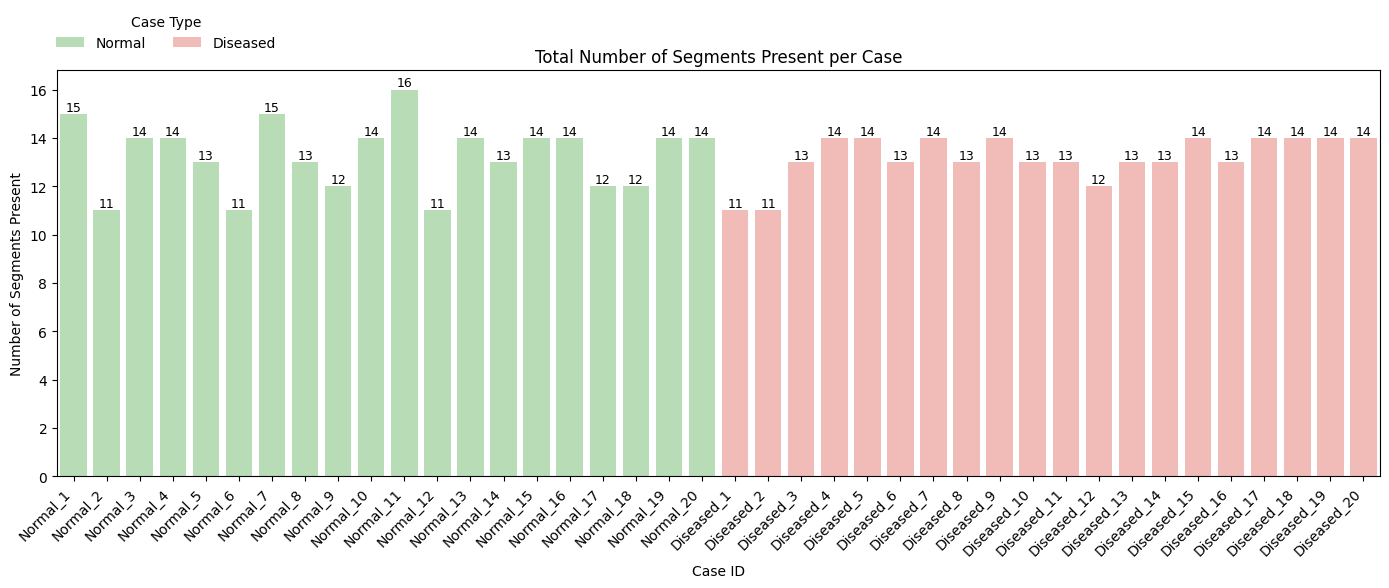

In [19]:
# Group and sort data
df_case = df_long.groupby(['Case', 'Case Type'])['Presence'].sum().reset_index()
df_case['Case Number'] = df_case['Case'].str.extract('(\d+)').astype(int)

# Sort by Case Type and Case Number
hue_order = ['Normal', 'Diseased']
df_case['Case Type'] = pd.Categorical(df_case['Case Type'], categories=hue_order, ordered=True)
df_case = df_case.sort_values(by=['Case Type', 'Case Number'])

# Pastel colours
custom_palette = {"Normal": "#B2E2B0", "Diseased": "#FBB4AE"}

# Plot
plt.figure(figsize=(14, 6))
bar_plot = sns.barplot(
    data=df_case,
    x='Case',
    y='Presence',
    hue='Case Type',
    hue_order=hue_order,
    dodge=False,
    palette=custom_palette
)

# Annotate bars
for bar in bar_plot.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        bar_plot.annotate(
            f'{int(height)}',
            (x, height),
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xlabel('Case ID')
plt.ylabel('Number of Segments Present')
plt.title('Total Number of Segments Present per Case')
plt.xticks(rotation=45, ha='right')

# Move legend to top left outside the plot
plt.legend(title='Case Type', loc='lower left', bbox_to_anchor=(-0.01, 1.02), ncol=2, frameon=False)

plt.tight_layout()
plt.show()


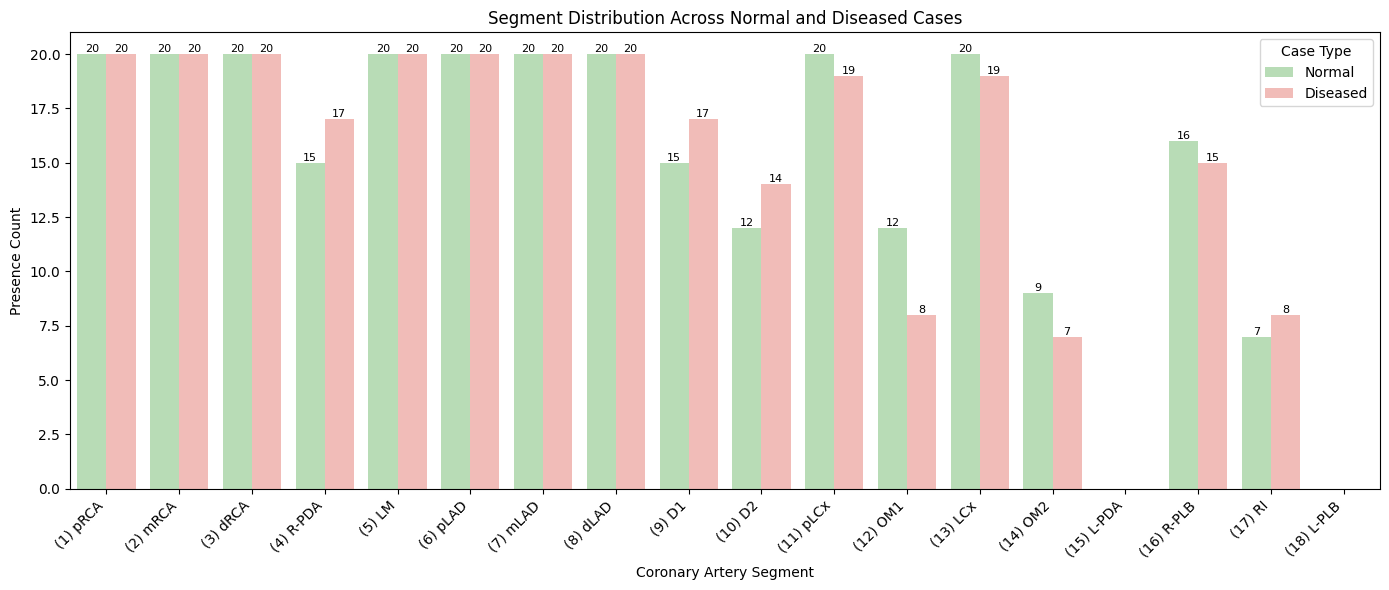

In [20]:
# Sort Abbreviation by segment number (extract number from the string)
df_grouped = df_long.groupby(['Abbreviation', 'Case Type', 'No.'])['Presence'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='No.')

# Force the hue order: Normal first, Diseased second
hue_order = ['Normal', 'Diseased']

# Define custom pastel colors
custom_palette = {"Normal": "#B2E2B0", "Diseased": "#FBB4AE"}

plt.figure(figsize=(14, 6))

bar_plot = sns.barplot(
    data=df_grouped,
    x='Abbreviation',
    y='Presence',
    hue='Case Type',
    hue_order=hue_order,
    dodge=True,
    palette=custom_palette
)

# Add annotations
for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:
        bar_plot.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=8)

plt.xlabel('Coronary Artery Segment')
plt.ylabel('Presence Count')
plt.title('Segment Distribution Across Normal and Diseased Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Case Type', loc='upper right')
plt.tight_layout()
plt.show()

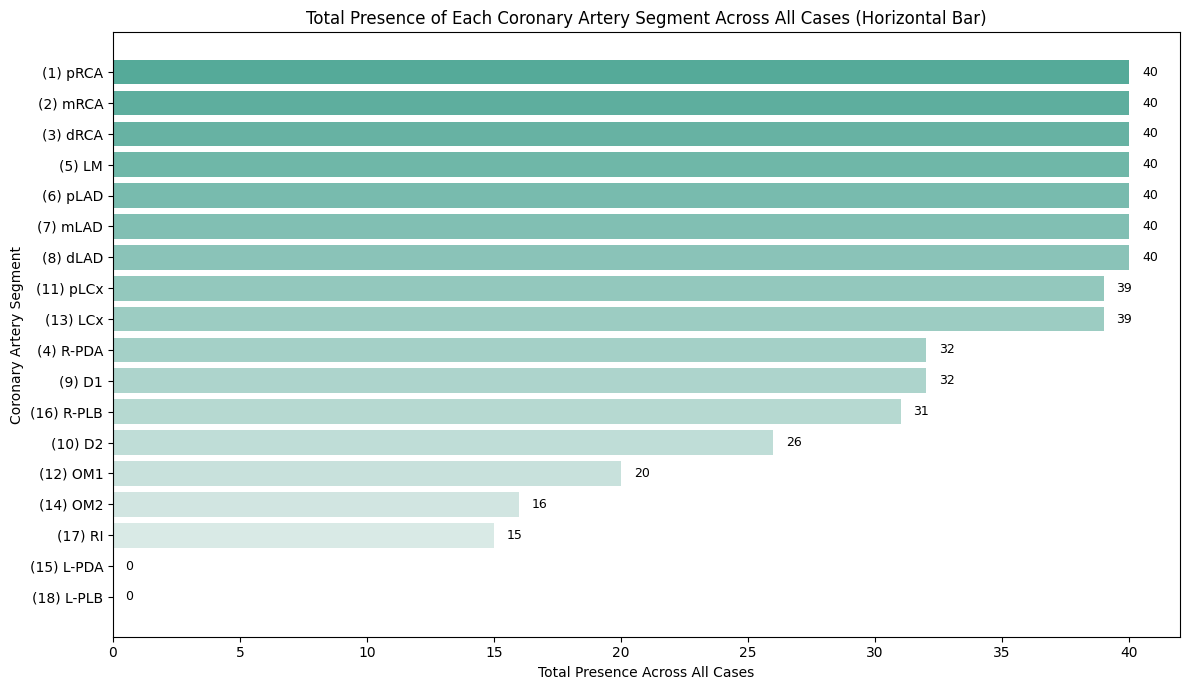

In [21]:
# Group and sort data
df_total = df_long.groupby(['Abbreviation', 'No.'])['Presence'].sum().reset_index()
df_total = df_total.sort_values(by=['Presence', 'No.'], ascending=[False, True])

# Generate light blue shades
num_segments = len(df_total)
colors = sns.color_palette("light:#5A9_r", n_colors=num_segments)

# Plot
plt.figure(figsize=(12, 7))
bar_plot = plt.barh(df_total['Abbreviation'], df_total['Presence'], color=colors)

# Add annotations: position exactly at the end of each bar
for bar in bar_plot:
    width = bar.get_width()  # This is the length of the bar
    y_pos = bar.get_y() + bar.get_height() / 2
    plt.text(
        width + 0.5,  # Slightly offset from the bar
        y_pos,
        f"{int(width)}",
        va='center',
        ha='left',
        fontsize=9
    )

plt.xlabel('Total Presence Across All Cases')
plt.ylabel('Coronary Artery Segment')
plt.title('Total Presence of Each Coronary Artery Segment Across All Cases (Horizontal Bar)')
plt.gca().invert_yaxis()  # Highest segment at the top
plt.tight_layout()
plt.show()


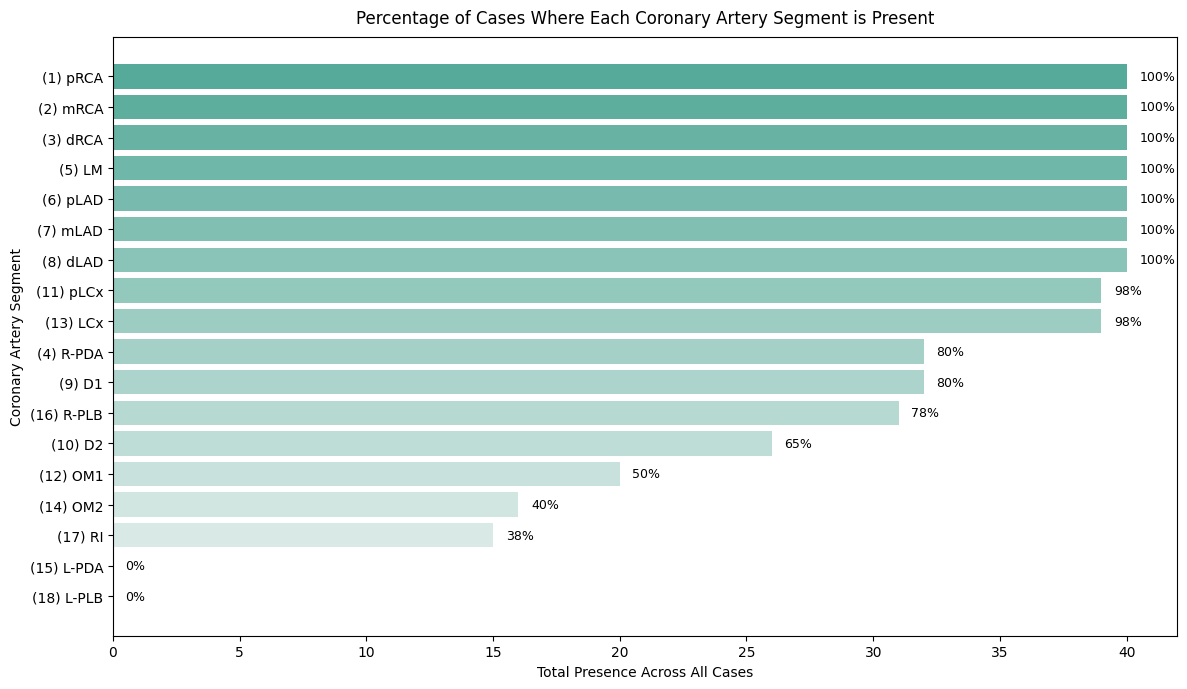

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Total de casos
total_cases = 40

# Agrupar y ordenar
df_total = df_long.groupby(['Abbreviation', 'No.'])['Presence'].sum().reset_index()
df_total = df_total.sort_values(by=['Presence', 'No.'], ascending=[False, True])

# Calcular porcentaje
df_total['Percentage'] = (df_total['Presence'] / total_cases) * 100

# Colores azul claro
num_segments = len(df_total)
colors = sns.color_palette("light:#5A9_r", n_colors=num_segments)

# Plot
plt.figure(figsize=(12, 7))
bars = plt.barh(df_total['Abbreviation'], df_total['Presence'], color=colors)

# Añadir porcentaje al lado de cada barra (alineado)
for bar, percentage in zip(bars, df_total['Percentage']):
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    plt.text(
        width + 0.5,  # Ligeramente desplazado a la derecha
        y_pos,
        f"{int(round(percentage))}%",  # Sin decimales
        va='center',
        ha='left',
        fontsize=9
    )

plt.xlabel('Total Presence Across All Cases')
plt.ylabel('Coronary Artery Segment')
plt.title('Percentage of Cases Where Each Coronary Artery Segment is Present', pad=10)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
